## Gradient boosting
is an ensemble machine learning algorithm that can be used for both classification and regression tasks. It works by sequentially training a number of weak learners, such as decision trees, and then combining their predictions to produce a final prediction.

Gradient boosting is similar to AdaBoost, but it uses a different method for updating the weights of the training examples. Gradient boosting uses the gradient of the loss function to update the weights of the training examples. This helps the subsequent weak learners to focus on the more difficult examples and to learn the more complex relationships between the features and the target variable.Gradient Boosting is like assembling a team of experts, each correcting the mistakes of the previous one, to solve a complex problem. It's a powerful machine learning technique that helps build accurate predictive models. 

### Objective:
Imagine you're solving a puzzle, and each expert in your team corrects a part of the puzzle until it's complete. Gradient Boosting is like having a team of experts who sequentially improve the model's predictions step by step.

### Explanation:

1. Weak Models: Gradient Boosting starts with a simple and weak model, often a decision tree with just a few branches. This model's predictions are far from perfect and may contain errors, just like the first draft of a puzzle.

2. Sequential Improvement: Instead of trying to create a perfect model all at once, Gradient Boosting focuses on improving one step at a time. It trains a new weak model to correct the errors made by the previous one. It's like having an expert who fixes part of the puzzle that the previous expert couldn't solve.

3. Weighted Learning: Gradient Boosting assigns a weight to each data point based on how much the current model's predictions differ from the actual values. Data points that were previously misclassified or poorly predicted receive higher weights. The new model pays more attention to these challenging points, similar to giving more focus to difficult parts of the puzzle.

4. Combining Predictions: After several rounds of training, Gradient Boosting combines the predictions from all the weak models. The final prediction is like the fully assembled puzzle, where each expert contributed to making it more accurate.

### Advantages:

1. High Accuracy: Gradient Boosting often yields highly accurate predictions because it focuses on correcting errors.
2. Versatility: It can be used for various machine learning tasks, including classification and regression.
3. Feature Importance: Gradient Boosting can tell you which features are most important for making predictions.
4. Gradient boosting can achieve high accuracy, even with weak learners.
5. Gradient boosting is robust to outliers.
6. Gradient boosting can be used for both classification and regression tasks.
7. Gradient boosting is flexible and can be customized to a variety of problems.

### Disadvantages:

1. Complexity: The algorithm can be computationally intensive and may require careful tuning.
2. Potential Overfitting: If not properly regulated, Gradient Boosting can overfit the training data.
3. Sensitive to Noisy Data: It can be sensitive to noisy data or outliers.
4. Gradient boosting can be sensitive to the choice of hyperparameters.
5. Gradient boosting can be computationally expensive to train for large datasets.

### Common Applications:

1. Ranking: In search engines, it's used for ranking search results based on relevance.
2. Predictive Modeling: Gradient Boosting is applied in various predictive modeling tasks such as predicting customer churn or housing prices.
3. Anomaly Detection: In cybersecurity, it's used to detect unusual patterns or cyber threats.
4. Recommendation Systems: In e-commerce and content recommendation, it's used to suggest products or content to users based on their preferences.
5. Classification: Gradient boosting can be used for a variety of classification tasks, such as spam detection, fraud detection, and image classification.
6. Regression: Gradient boosting can also be used for regression tasks, such as predicting the price of a house or the number of visitors to a website.
7. Ranking: Gradient boosting can also be used for ranking tasks, such as ranking search results or product recommendations.

In summary, Gradient Boosting is a machine learning technique that builds accurate models by sequentially correcting errors made by previous models. It's versatile, highly accurate, but may require careful tuning. It finds applications in various domains where precise predictions are essential.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [37]:
df = pd.DataFrame()

In [38]:
df['X'] = X.reshape(100)
df['y'] = y

In [39]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

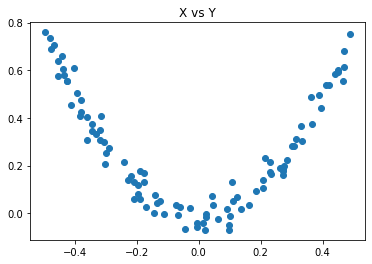

In [40]:
plt.scatter(df['X'],df['y']) # Relation between X and y
plt.title('X vs Y')

# Step 1

In [41]:
df['pred1'] = df['y'].mean() # First model on gradient boositng is the mean value of the output

In [42]:
df # pred1 is the mean of y

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [43]:
df['res1'] = df['y'] - df['pred1'] # THis gives the residual of model 1  actual(y) - pred(pred1)

In [44]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


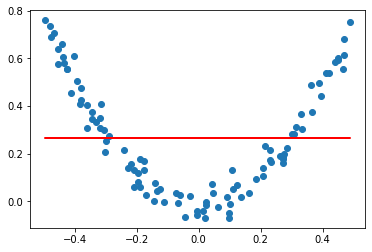

In [45]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red') # This is how my model 1 looks right now. Since we took mean which is why parrellel to x-axis

# Step 2
Creating second model with decision tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8) # In gradient boosting decision stomps is not used instead the leaf_nodes lies between the range 8 - 32

In [47]:
# THe input for this model is the actual data and the output will be the residual of model 1
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

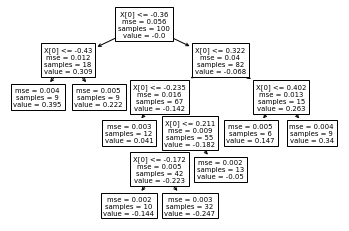

In [48]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [49]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)

In [50]:
# Testing the model m1(ouptut of model1)+m2(output of model 2)
# m2 is calculated by giving the test set to the tree which will tell where does the point lie hence that will be the predicted output
y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1)) 

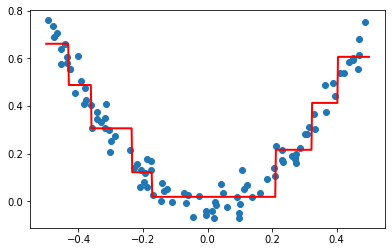

In [51]:
# THis is the overall prediction model 1 + model 2
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [52]:
# Prediction for model 2
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [53]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [54]:
# THis gives the residual of model 2  actual(y) - pred(pred2)
df['res2'] = df['y'] - df['pred2']

In [55]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


# Step 3
Taking decision tree as the thired model

In [56]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [57]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

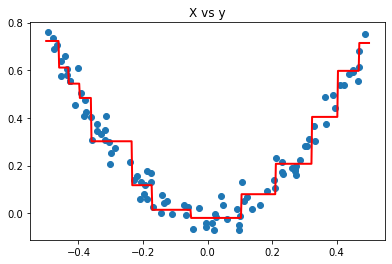

In [59]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [60]:
# THis is the funcion made, where you can justify the no. of models you wanna train
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)
